# Exploratory Data Analysis for Students Performance Dataset.

## Import Libraries and Dataset

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("./StudentsPerformance.csv")

## Dataset Info

In [124]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [125]:
df.shape # num of cols and rows

(1000, 8)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [127]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [128]:
# unique values in each column
categorial_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

for col in categorial_cols:
    print(f"{col}: {[val for val in df[col].unique()]}")

gender: ['female', 'male']
race/ethnicity: ['group B', 'group C', 'group A', 'group D', 'group E']
parental level of education: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
lunch: ['standard', 'free/reduced']
test preparation course: ['none', 'completed']


So the data contains **8 columns**, which I can classify into 2 categories
- **Categorial Data & Potential Reasons:** gender, race/ethnicity, parental level of education, lunch, test preparation course.
- **Numrical Data & Potential Results:** math score, reading score, writing score.


We also have 1000 records/rows, with no null values in any cell.

# Exploring Data.

In [129]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


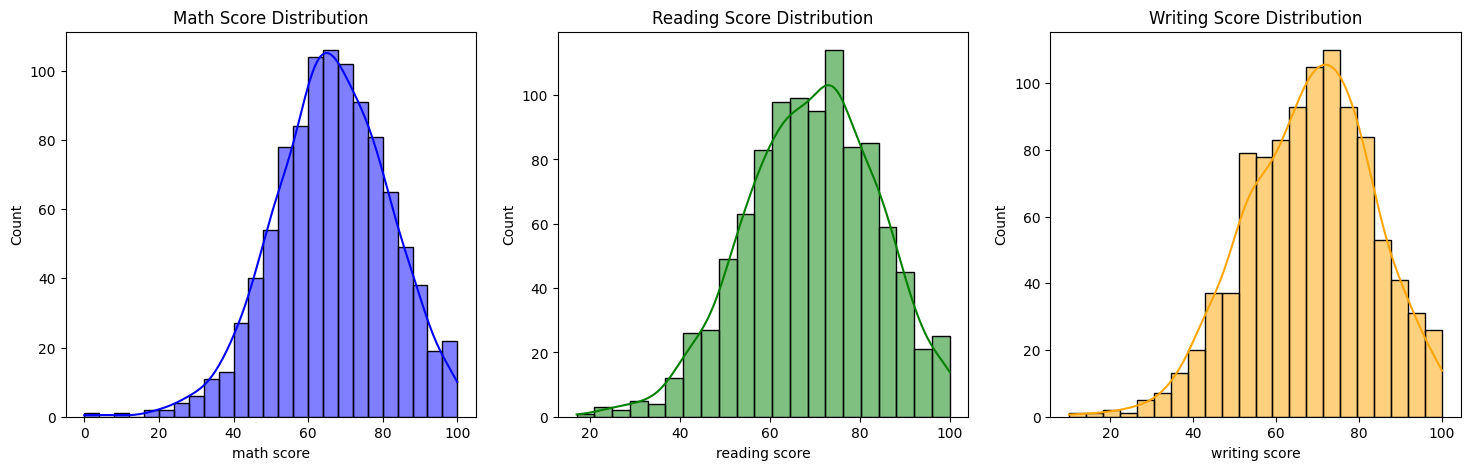

In [130]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='orange')
plt.title('Writing Score Distribution')
plt.show()

We can notice that:
- Math has the lowest (mean, percentile, min) values, students tend to struggle a bit more in math.
- Reading has the heighst (mean, percentile, min) values, so students tend to get better grades in reading.
- The data shows a normal distrubtion graph.

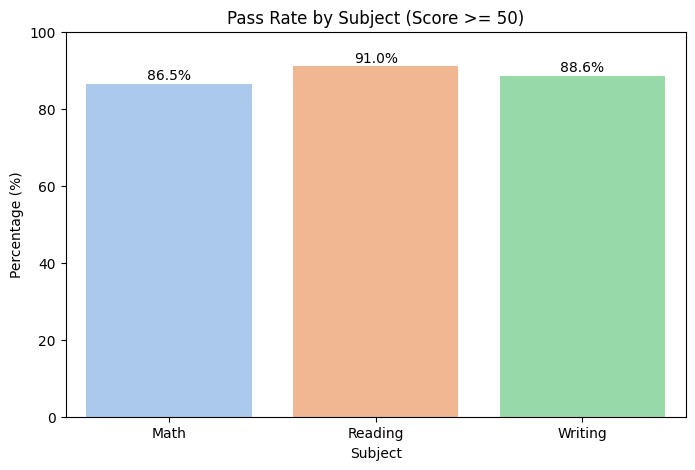

In [139]:
# percentage of students who passed in each subjects (assuming passing score is 50)
passing_score = 50
math_pass_rate = (df['math score'] >= passing_score).mean() * 100
reading_pass_rate = (df['reading score'] >= passing_score).mean() * 100
writing_pass_rate = (df['writing score'] >= passing_score).mean() * 100

pass_rates = pd.DataFrame({
    'Subject': ['Math', 'Reading', 'Writing'],
    'Pass Rate': [math_pass_rate, reading_pass_rate, writing_pass_rate]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=pass_rates, x='Subject', y='Pass Rate', palette='pastel')
plt.ylim(0, 100)
plt.title('Pass Rate by Subject (Score >= 50)')
plt.ylabel('Percentage (%)')
for index, row in pass_rates.iterrows():
    plt.text(index, row['Pass Rate'] + 1, f"{row['Pass Rate']:.1f}%", ha='center', color='black')
plt.show()

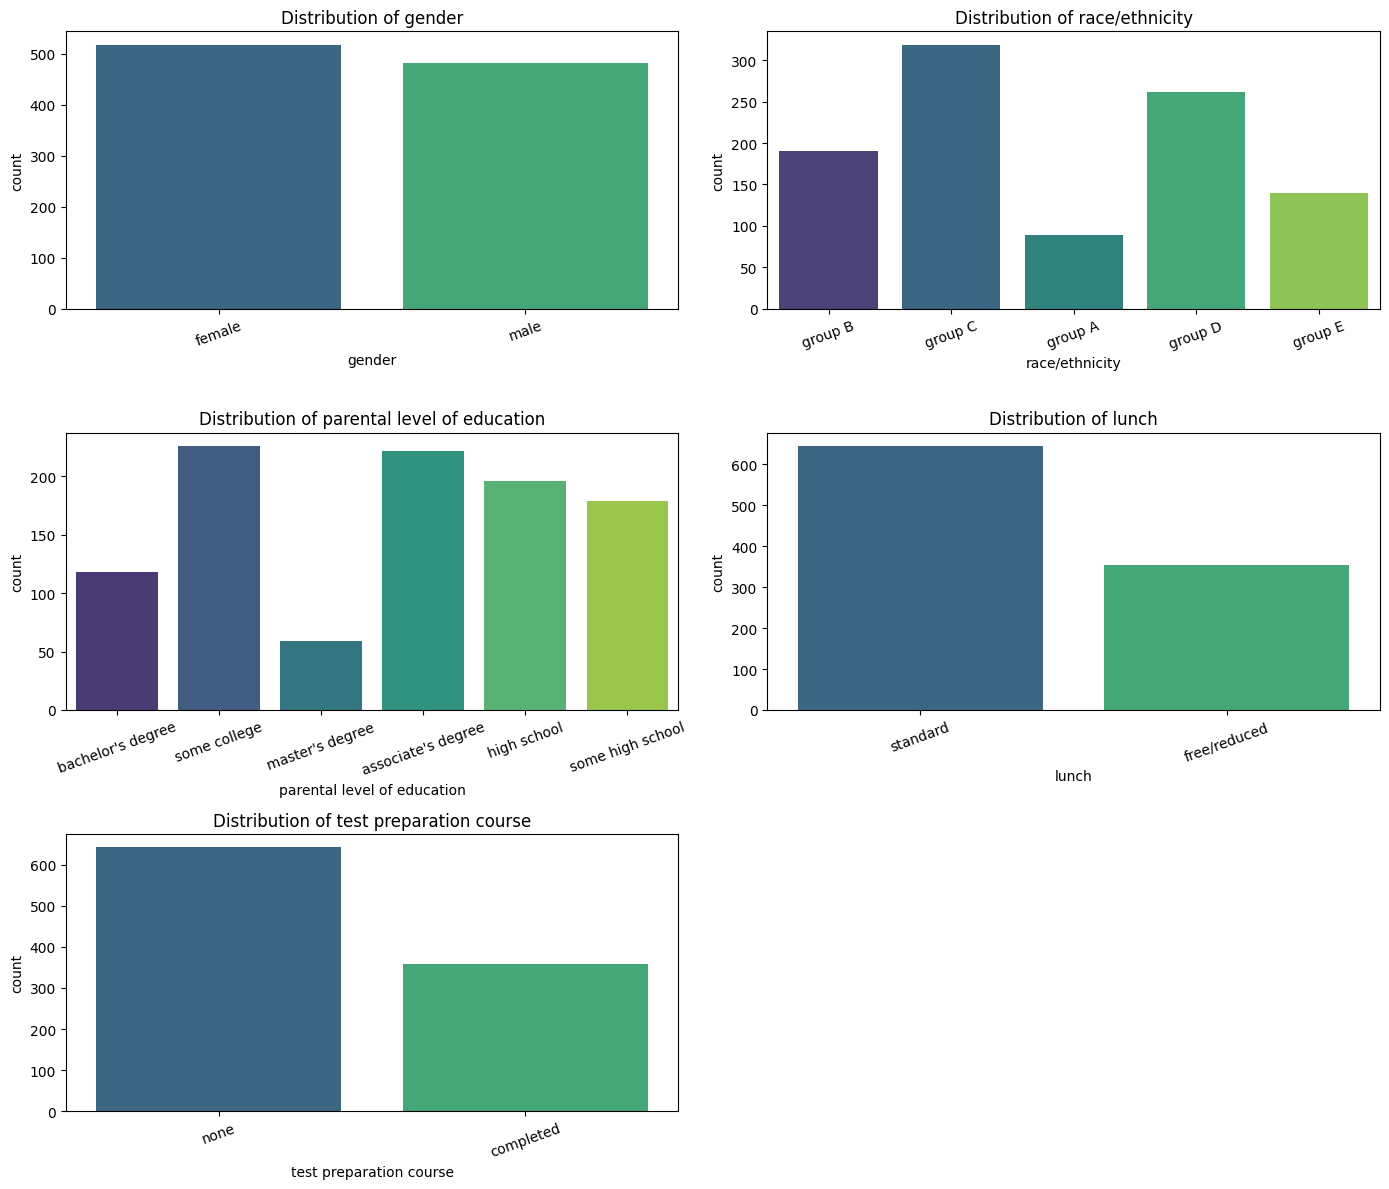

In [132]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(categorial_cols):
    sns.countplot(data=df, x=col, palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=20)

axes[-1].remove()  # Remove the empty subplot
plt.tight_layout()
plt.show()

# Exploring Relations

## Gender distribution

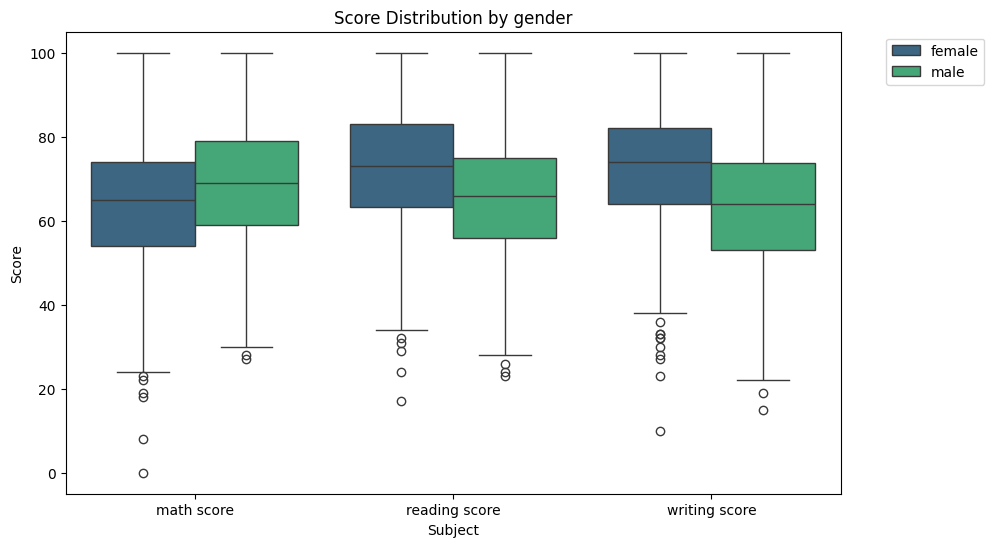

In [133]:
def plot_categorical_relation(df, cat_col, num_cols):
    melted = df.melt(id_vars=cat_col, value_vars=num_cols, var_name='Subject', value_name='Score')
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=melted, x='Subject', y='Score', hue=cat_col, palette='viridis')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Score Distribution by {cat_col}')
    plt.show()


plot_categorical_relation(df, 'gender', numerical_cols)

Males show a wider spread of scores in Math (longer whiskers in the boxplot), while Females show more consistent performance in Reading and Writing.

## Race/Ethnicty Disrtubtion

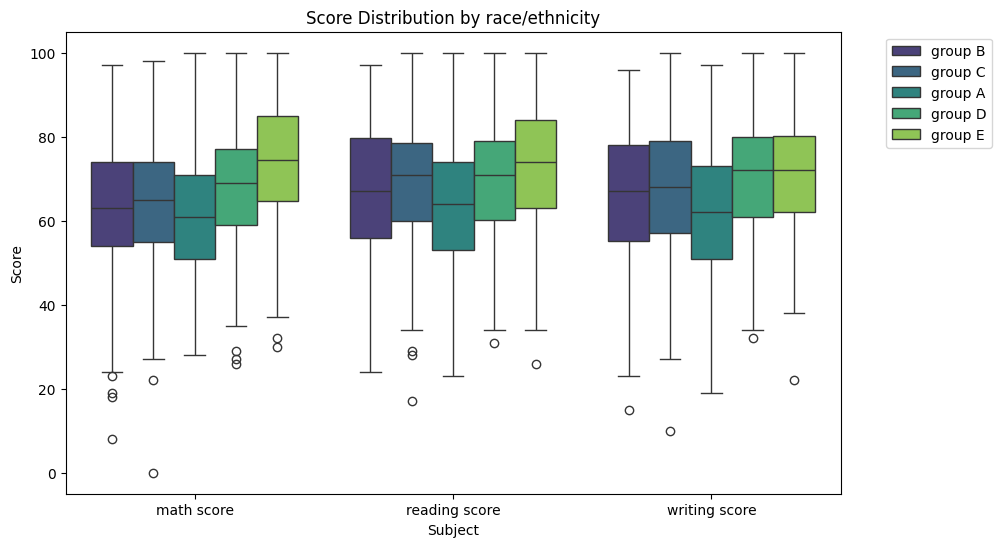

In [134]:
plot_categorical_relation(df, 'race/ethnicity', numerical_cols)

- For all subjects, average scores increase steadily from group A to group E.
- Group A has the lowest averages in math, reading, and writing.
- Group E has the highest averages in all three subjects.

## Parental level of education distrbution

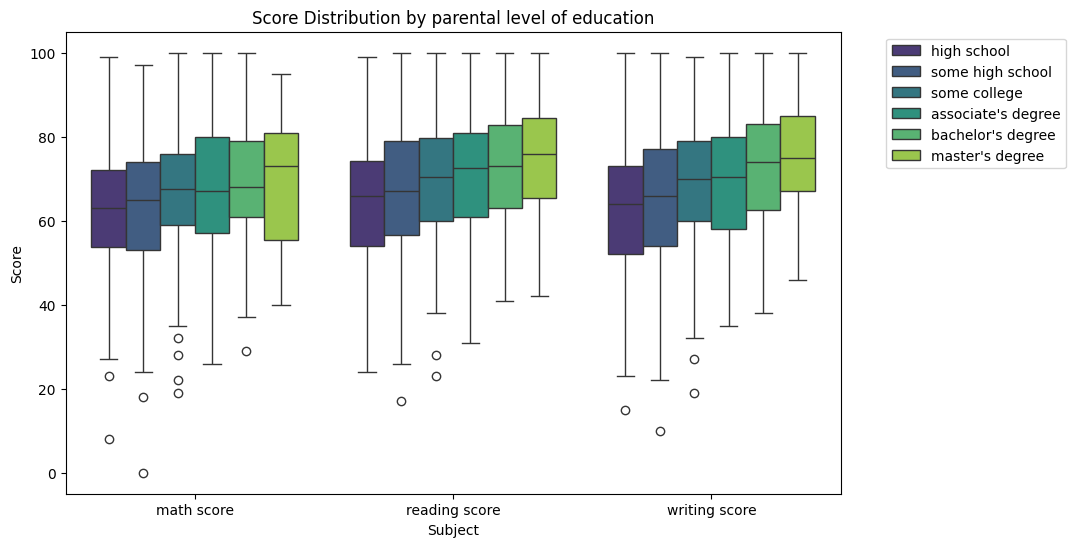

In [135]:
education_order = ['high school', 'some high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
df['parental level of education'] = pd.Categorical(df['parental level of education'], categories=education_order, ordered=True)

plot_categorical_relation(df, 'parental level of education', numerical_cols)


- Average scores increase monotonically with higher parental education in all subjects.
- Students whose parents have a master’s degree achieve the highest averages; those with high school or some high school have the lowest.
- The performance gap between the lowest and highest parental education levels is substantial and consistent across subjects.

## Lunch type (The financial condition)

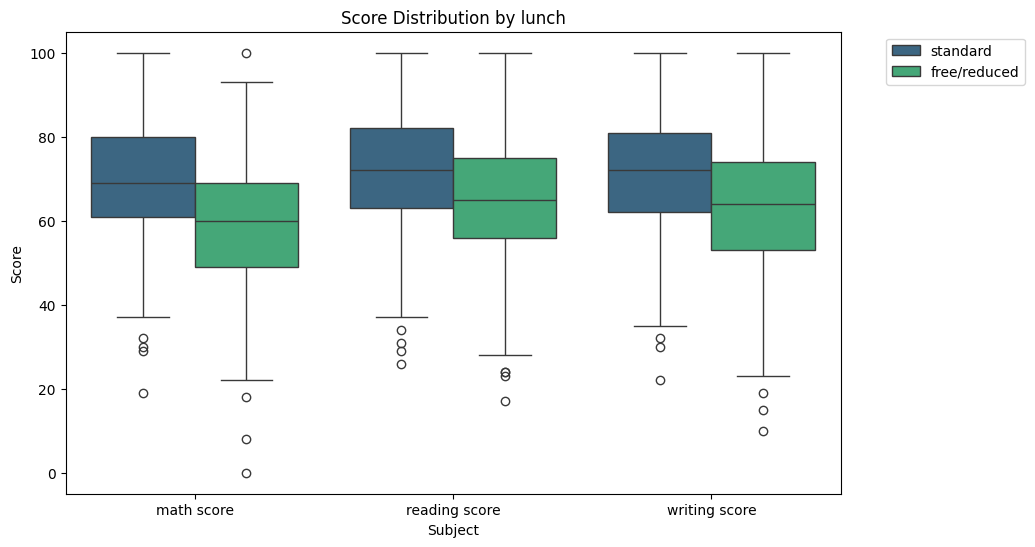

In [136]:
plot_categorical_relation(df, 'lunch', numerical_cols)

- Students with standard lunch score higher than those with free/reduced lunch in all three subjects.
- The gap is largest in math, and slightly smaller but still clear in reading and writing.
- Reading has the highest averages for both lunch types; math is the lowest.

Interpretation:
- Lunch type is a strong proxy for financial status, and the consistent gap suggests financial status is associated with academic performance.
- This is correlation, not causation. Lunch type itself does not cause higher scores.

## Test preperation course status disrtubtion.

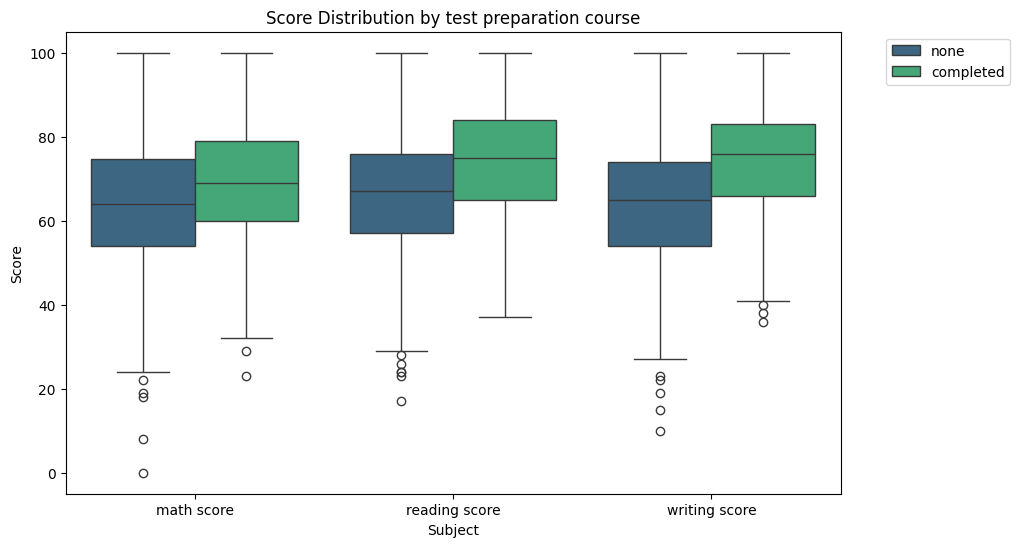

In [137]:
plot_categorical_relation(df, 'test preparation course', numerical_cols)

- Students who completed the test preparation course score higher than those with no preparation in all subjects.
- The largest gap appears in writing, followed by reading, then math.

Interpretation:
Test preparation course completion is strongly associated with better academic performance.

## Correlation between scores

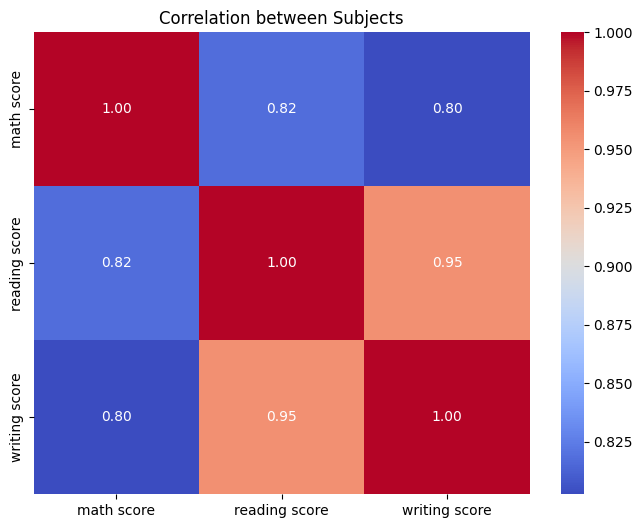

In [138]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Subjects')
plt.show()

There is a strong positive correlation (approx 0.95) between Reading and Writing. This suggests that students who excel in one language skill are highly likely to excel in the other, likely due to shared underlying verbal abilities.

# Conclusion & Insights

## Key Findings
1.  **Socioeconomic Factor is Dominant:** The "Lunch" variable (a proxy for financial status) and "Parental Level of Education" have the most distinct impact on student performance. Students with standard lunch and highly educated parents consistently score higher.
2.  **The "Math Struggle":** Across almost all groups, Math scores are generally lower and have more variance than Reading and Writing. It appears to be the subject students struggle with the most.
3.  **Preparation Matters:** The Test Preparation Course shows a clear positive association with scores, proving its effectiveness.
4.  **Skill Correlation:** Reading and Writing are extremely highly correlated ($0.95$). If a student is good at one, they are almost certainly good at the other. Math is distinct, requiring a different skill set.

## Recommendations
*   **Targeted Math Support:** Since Math is the lowest-scoring subject, schools should invest more resources in math tutoring, specifically for students from lower-income backgrounds (Free/Reduced lunch group).
*   **Promote Test Prep:** Given the clear benefits, the school should encourage more students to enroll in the test preparation course, perhaps by subsidizing it for those with "Free/Reduced" lunch.

and thank you for exploring with me!